In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.weightstats import ttest_ind
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
import statsmodels.api as sm

In [89]:
#create dataframes
dpw_df = pd.read_csv("2425data/NO2_DPW_2425.csv")
pema_df = pd.read_csv("2425data/NO2_PEMA_2425.csv")
pha_df = pd.read_csv("2425data/NO2_PHA_2425.csv")
low_rsd_df = pd.read_csv("2425data/low_rsd.csv")

In [90]:
# shifting the date format to be a little more readable and useable for time series
dpw_df["timestamp"] = pd.to_datetime(dpw_df["timestamp"])
dpw_df["timestamp_local"] = pd.to_datetime(dpw_df["timestamp_local"])

dpw_df["date_utc"] = dpw_df["timestamp"].dt.strftime("%Y-%m-%d")
dpw_df["time_utc"] = dpw_df["timestamp"].dt.strftime("%H:%M:%S")

dpw_df["date_est"] = dpw_df["timestamp_local"].dt.strftime("%Y-%m-%d")
dpw_df["time_est"] = dpw_df["timestamp_local"].dt.strftime("%H:%M:%S")

columns_to_remove2 = ["timestamp", "timestamp_local"]
dpw_df = dpw_df.drop(columns=columns_to_remove2)
new_order = ["date_utc", "time_utc", "date_est", "time_est","sn","rh","temp","lat","lon","device_state","pm1","pm25","pm10","co","no","no2","o3","pm1_model_id","pm25_model_id","pm10_model_id","co_model_id","no_model_id","no2_model_id","o3_model_id"]
dpw_df = dpw_df[new_order]

pema_df["timestamp"] = pd.to_datetime(pema_df["timestamp"])
pema_df["timestamp_local"] = pd.to_datetime(pema_df["timestamp_local"])

pema_df["date_utc"] = pema_df["timestamp"].dt.strftime("%Y-%m-%d")
pema_df["time_utc"] = pema_df["timestamp"].dt.strftime("%H:%M:%S")

pema_df["date_est"] = pema_df["timestamp_local"].dt.strftime("%Y-%m-%d")
pema_df["time_est"] = pema_df["timestamp_local"].dt.strftime("%H:%M:%S")

columns_to_remove2 = ["timestamp", "timestamp_local"]
pema_df = pema_df.drop(columns=columns_to_remove2)
new_order = ["date_utc", "time_utc", "date_est", "time_est","sn","rh","temp","lat","lon","device_state","wd","ws","pm1","pm25","pm10","co","no","no2","o3","pm1_model_id","pm25_model_id","pm10_model_id","co_model_id","no_model_id","no2_model_id","o3_model_id", "ws_scalar"]
pema_df = pema_df[new_order]

pha_df["timestamp"] = pd.to_datetime(pha_df["timestamp"])
pha_df["timestamp_local"] = pd.to_datetime(pha_df["timestamp_local"])

pha_df["date_utc"] = pha_df["timestamp"].dt.strftime("%Y-%m-%d")
pha_df["time_utc"] = pha_df["timestamp"].dt.strftime("%H:%M:%S")

pha_df["date_est"] = pha_df["timestamp_local"].dt.strftime("%Y-%m-%d")
pha_df["time_est"] = pha_df["timestamp_local"].dt.strftime("%H:%M:%S")

columns_to_remove2 = ["timestamp", "timestamp_local"]
pha_df = pha_df.drop(columns=columns_to_remove2)
pha_df = pha_df[new_order]

In [91]:
dpw_df.head()

,date_utc,time_utc,date_est,time_est,sn,rh,temp,lat,lon,device_state,...,no,no2,o3,pm1_model_id,pm25_model_id,pm10_model_id,co_model_id,no_model_id,no2_model_id,o3_model_id
0,2025-04-30,23:59:53,2025-04-30,19:59:53,MOD-00811,19.2,21.4,41.79521,-71.39783,ACTIVE,...,2.188,7.695,54.545,16235.0,16236.0,16237.0,16133.0,16140.0,16147.0,16126.0
1,2025-04-30,23:58:53,2025-04-30,19:58:53,MOD-00811,19.4,21.5,41.79521,-71.39783,ACTIVE,...,1.996,7.744,53.284,16235.0,16236.0,16237.0,16133.0,16140.0,16147.0,16126.0
2,2025-04-30,23:57:53,2025-04-30,19:57:53,MOD-00811,18.7,21.5,41.79521,-71.39783,ACTIVE,...,2.191,8.391,51.882,16235.0,16236.0,16237.0,16133.0,16140.0,16147.0,16126.0
3,2025-04-30,23:56:53,2025-04-30,19:56:53,MOD-00811,17.7,21.6,41.79521,-71.39783,ACTIVE,...,2.259,7.459,53.250,16235.0,16236.0,16237.0,16133.0,16140.0,16147.0,16126.0
4,2025-04-30,23:55:53,2025-04-30,19:55:53,MOD-00811,17.3,21.6,41.79521,-71.39783,ACTIVE,...,2.258,7.971,53.545,16235.0,16236.0,16237.0,16133.0,16140.0,16147.0,16126.0


In [92]:
pema_df.head()

,date_utc,time_utc,date_est,time_est,sn,rh,temp,lat,lon,device_state,...,no2,o3,pm1_model_id,pm25_model_id,pm10_model_id,co_model_id,no_model_id,no2_model_id,o3_model_id,ws_scalar
0,2025-04-30,23:59:17,2025-04-30,19:59:17,MOD-00810,20.1,20.7,41.8522,-71.4198,ACTIVE,...,8.464,53.604,16071,16072,16073,16132,16139,16146,16125,3.41
1,2025-04-30,23:58:17,2025-04-30,19:58:17,MOD-00810,19.8,20.8,41.8522,-71.4198,ACTIVE,...,8.370,52.890,16071,16072,16073,16132,16139,16146,16125,5.55
2,2025-04-30,23:57:17,2025-04-30,19:57:17,MOD-00810,20.1,20.9,41.8522,-71.4198,ACTIVE,...,8.484,52.609,16071,16072,16073,16132,16139,16146,16125,3.60
3,2025-04-30,23:56:17,2025-04-30,19:56:17,MOD-00810,20.1,20.9,41.8522,-71.4198,ACTIVE,...,8.438,52.861,16071,16072,16073,16132,16139,16146,16125,4.84
4,2025-04-30,23:55:17,2025-04-30,19:55:17,MOD-00810,20.3,21.0,41.8522,-71.4198,ACTIVE,...,8.555,51.585,16071,16072,16073,16132,16139,16146,16125,3.19


In [93]:
pha_df.head()

,date_utc,time_utc,date_est,time_est,sn,rh,temp,lat,lon,device_state,...,no2,o3,pm1_model_id,pm25_model_id,pm10_model_id,co_model_id,no_model_id,no2_model_id,o3_model_id,ws_scalar
0,2025-04-30,23:59:47,2025-04-30,19:59:47,MOD-00812,19.8,19.4,41.8171,-71.4553,ACTIVE,...,8.865,53.458,16238.0,16239.0,16240.0,16134.0,16141.0,16148.0,16127.0,0.86
1,2025-04-30,23:58:47,2025-04-30,19:58:47,MOD-00812,19.9,19.5,41.8171,-71.4553,ACTIVE,...,9.356,51.927,16238.0,16239.0,16240.0,16134.0,16141.0,16148.0,16127.0,1.54
2,2025-04-30,23:57:47,2025-04-30,19:57:47,MOD-00812,19.8,19.5,41.8171,-71.4553,ACTIVE,...,9.334,52.956,16238.0,16239.0,16240.0,16134.0,16141.0,16148.0,16127.0,1.09
3,2025-04-30,23:56:47,2025-04-30,19:56:47,MOD-00812,19.6,19.6,41.8171,-71.4553,ACTIVE,...,8.711,51.969,16238.0,16239.0,16240.0,16134.0,16141.0,16148.0,16127.0,2.06
4,2025-04-30,23:55:47,2025-04-30,19:55:47,MOD-00812,19.5,19.7,41.8171,-71.4553,ACTIVE,...,8.604,54.015,16238.0,16239.0,16240.0,16134.0,16141.0,16148.0,16127.0,2.21


In [94]:
low_rsd_df["datetime"] = pd.to_datetime(low_rsd_df["datetime"])
dpw_df["datetime_utc"] = pd.to_datetime(dpw_df["date_utc"] + " " + dpw_df["time_utc"])

dpw_df["hour_utc"] = dpw_df["datetime_utc"].dt.floor("h")

target_hours = set(low_rsd_df["datetime"])

#take only datetimes from the list
dpw_filtered_df = dpw_df[dpw_df["hour_utc"].isin(target_hours)].copy()

#get rid of helper column
dpw_filtered_df.drop(columns=["hour_utc"], inplace=True)

In [95]:
pema_df["datetime_utc"] = pd.to_datetime(pema_df["date_utc"] + " " + pema_df["time_utc"])

pema_df["hour_utc"] = pema_df["datetime_utc"].dt.floor("h")

#take only datetimes from the list
pema_filtered_df = pema_df[pema_df["hour_utc"].isin(target_hours)].copy()

#get rid of helper column
pema_filtered_df.drop(columns=["hour_utc"], inplace=True)

In [96]:
pha_df["datetime_utc"] = pd.to_datetime(pha_df["date_utc"] + " " + pha_df["time_utc"])

pha_df["hour_utc"] = pha_df["datetime_utc"].dt.floor("h")

#take only datetimes from the list
pha_filtered_df = pha_df[pha_df["hour_utc"].isin(target_hours)].copy()

#get rid of helper column
pha_filtered_df.drop(columns=["hour_utc"], inplace=True)

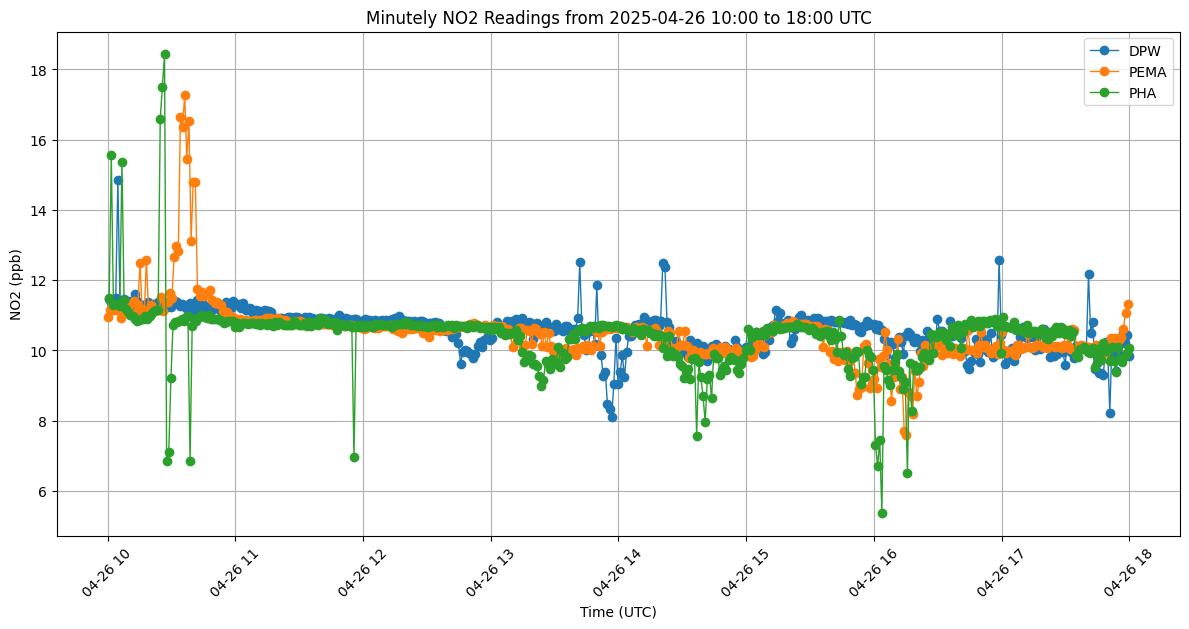

In [97]:
#example minutely visuals of time frames with similar readings
start_time = pd.Timestamp("2025-04-26 10:00:00")
end_time = pd.Timestamp("2025-04-26 18:00:00")

dpw_subset = dpw_filtered_df[
    (dpw_filtered_df["datetime_utc"] >= start_time) &
    (dpw_filtered_df["datetime_utc"] <= end_time)
]

pema_subset = pema_filtered_df[
    (pema_filtered_df["datetime_utc"] >= start_time) &
    (pema_filtered_df["datetime_utc"] <= end_time)
]

pha_subset = pha_filtered_df[
    (pha_filtered_df["datetime_utc"] >= start_time) &
    (pha_filtered_df["datetime_utc"] <= end_time)
]

plt.figure(figsize=(12, 6))

plt.plot(dpw_subset["datetime_utc"], dpw_subset["no2"], label="DPW", marker="o", linewidth=1)
plt.plot(pema_subset["datetime_utc"], pema_subset["no2"], label="PEMA", marker="o", linewidth=1)
plt.plot(pha_subset["datetime_utc"], pha_subset["no2"], label="PHA", marker="o", linewidth=1)

plt.xlabel("Time (UTC)")
plt.ylabel("NO2 (ppb)")
plt.title("Minutely NO2 Readings from 2025-04-26 10:00 to 18:00 UTC")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


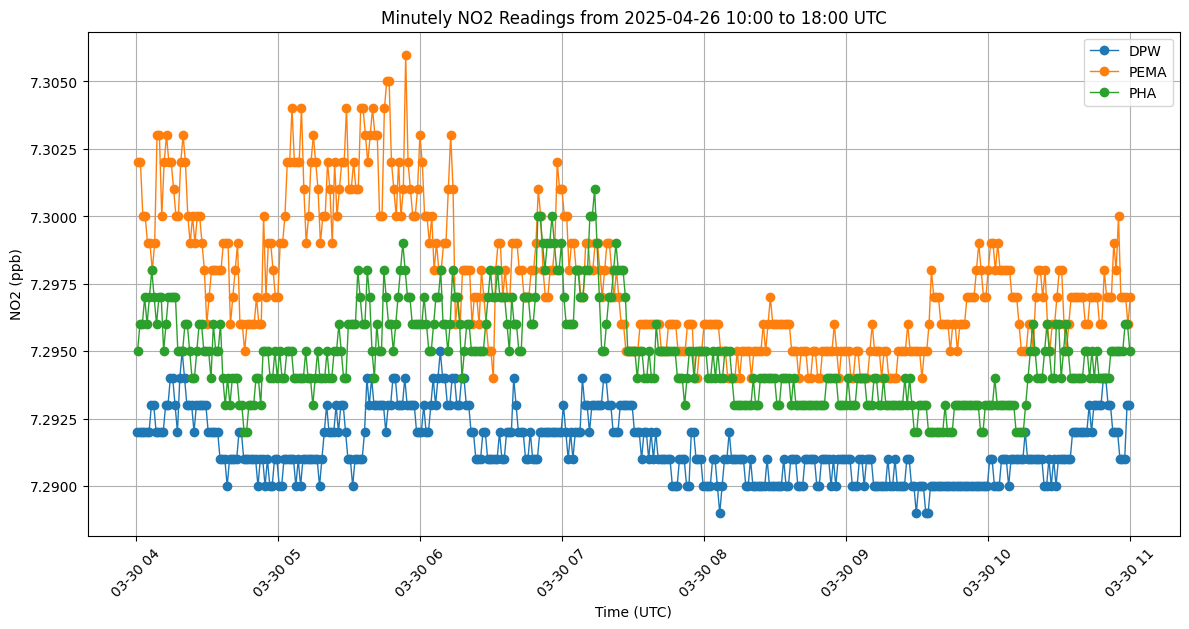

In [98]:
start_time = pd.Timestamp("2025-03-30 04:00:00")
end_time = pd.Timestamp("2025-03-30 11:00:00")

dpw_subset = dpw_filtered_df[
    (dpw_filtered_df["datetime_utc"] >= start_time) &
    (dpw_filtered_df["datetime_utc"] <= end_time)
]

pema_subset = pema_filtered_df[
    (pema_filtered_df["datetime_utc"] >= start_time) &
    (pema_filtered_df["datetime_utc"] <= end_time)
]

pha_subset = pha_filtered_df[
    (pha_filtered_df["datetime_utc"] >= start_time) &
    (pha_filtered_df["datetime_utc"] <= end_time)
]

plt.figure(figsize=(12, 6))

plt.plot(dpw_subset["datetime_utc"], dpw_subset["no2"], label="DPW", marker="o", linewidth=1)
plt.plot(pema_subset["datetime_utc"], pema_subset["no2"], label="PEMA", marker="o", linewidth=1)
plt.plot(pha_subset["datetime_utc"], pha_subset["no2"], label="PHA", marker="o", linewidth=1)

plt.xlabel("Time (UTC)")
plt.ylabel("NO2 (ppb)")
plt.title("Minutely NO2 Readings from 2025-03-30 04:00:00 to 2025-03-30 11:00:00")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


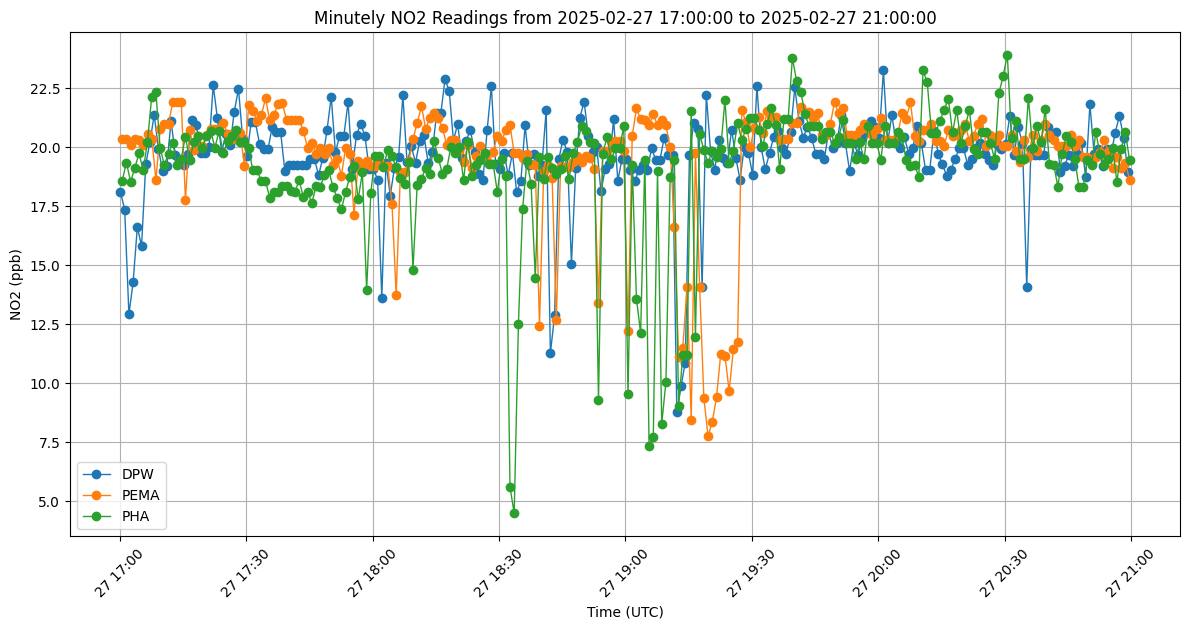

In [103]:
start_time = pd.Timestamp("2025-02-27 17:00:00")
end_time = pd.Timestamp("2025-02-27 21:00:00")

dpw_subset = dpw_filtered_df[
    (dpw_filtered_df["datetime_utc"] >= start_time) &
    (dpw_filtered_df["datetime_utc"] <= end_time)
]

pema_subset = pema_filtered_df[
    (pema_filtered_df["datetime_utc"] >= start_time) &
    (pema_filtered_df["datetime_utc"] <= end_time)
]

pha_subset = pha_filtered_df[
    (pha_filtered_df["datetime_utc"] >= start_time) &
    (pha_filtered_df["datetime_utc"] <= end_time)
]

plt.figure(figsize=(12, 6))

plt.plot(dpw_subset["datetime_utc"], dpw_subset["no2"], label="DPW", marker="o", linewidth=1)
plt.plot(pema_subset["datetime_utc"], pema_subset["no2"], label="PEMA", marker="o", linewidth=1)
plt.plot(pha_subset["datetime_utc"], pha_subset["no2"], label="PHA", marker="o", linewidth=1)

plt.xlabel("Time (UTC)")
plt.ylabel("NO2 (ppb)")
plt.title("Minutely NO2 Readings from 2025-02-27 17:00:00 to 2025-02-27 21:00:00")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


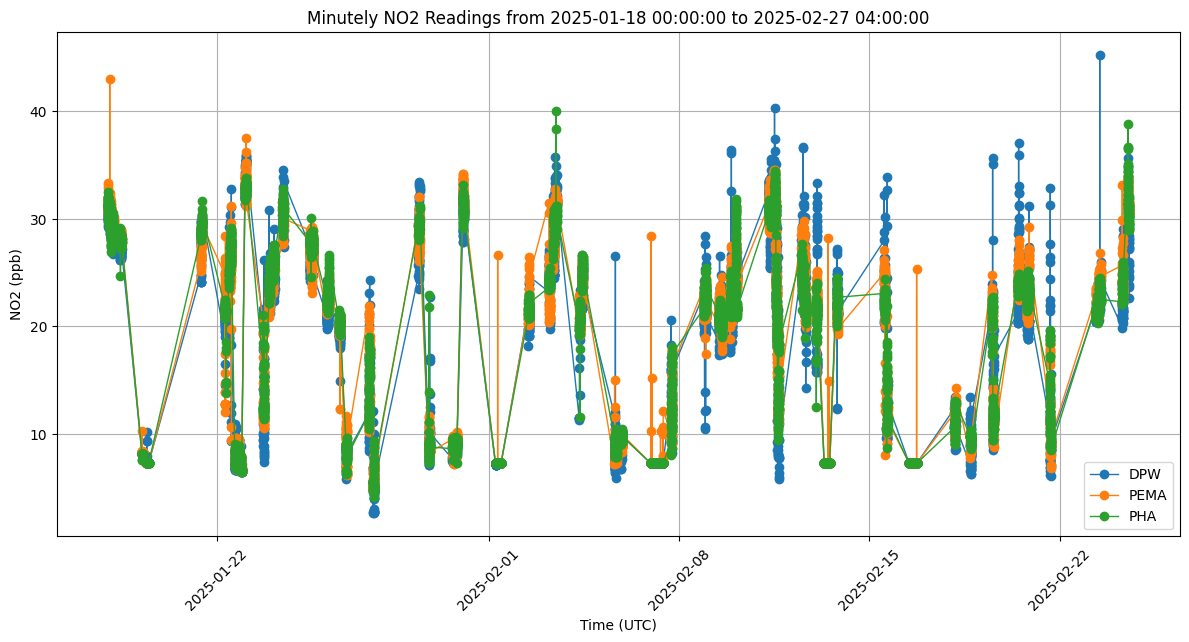

In [104]:
start_time = pd.Timestamp("2025-01-18 00:00:00")
end_time = pd.Timestamp("2025-02-27 04:00:00")

dpw_subset = dpw_filtered_df[
    (dpw_filtered_df["datetime_utc"] >= start_time) &
    (dpw_filtered_df["datetime_utc"] <= end_time)
]

pema_subset = pema_filtered_df[
    (pema_filtered_df["datetime_utc"] >= start_time) &
    (pema_filtered_df["datetime_utc"] <= end_time)
]

pha_subset = pha_filtered_df[
    (pha_filtered_df["datetime_utc"] >= start_time) &
    (pha_filtered_df["datetime_utc"] <= end_time)
]

plt.figure(figsize=(12, 6))

plt.plot(dpw_subset["datetime_utc"], dpw_subset["no2"], label="DPW", marker="o", linewidth=1)
plt.plot(pema_subset["datetime_utc"], pema_subset["no2"], label="PEMA", marker="o", linewidth=1)
plt.plot(pha_subset["datetime_utc"], pha_subset["no2"], label="PHA", marker="o", linewidth=1)

plt.xlabel("Time (UTC)")
plt.ylabel("NO2 (ppb)")
plt.title("Minutely NO2 Readings from 2025-01-18 00:00:00 to 2025-02-27 04:00:00")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()
